Below is a **notebook-friendly, lecture-ready version** with **clear markdown sections and inline explanations**. You can paste this directly into a Jupyter notebook and run it cell by cell while teaching.

---

## Predicting Iris Flower Species

### Using Petal Length & Petal Width with SGDClassifier

In this notebook, we will:

1. Load the **Iris dataset**
2. Select **only two features**: petal length and petal width
3. Train a **linear classifier** using **Stochastic Gradient Descent (SGD)**
4. Visualize the **decision (prediction) regions**

This example is useful for understanding:

* Linear classification
* Feature scaling
* Decision boundaries in 2D feature space

---

##  Import Required Libraries


In [4]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


**Why these libraries?**

* `numpy`: numerical computations
* `matplotlib`: visualization
* `scikit-learn`: datasets, preprocessing, and machine learning models
## 2. Load the Iris Dataset

In [5]:
iris = load_iris()

* 150 samples
* 3 classes: *setosa*, *versicolor*, *virginica*
* 4 features (we will only use 2)

---

## 3. Select Features and Target

We will use:

* **Petal length (cm)**
* **Petal width (cm)**

In [6]:
X = iris.data[:, [2, 3]]  # petal length, petal width
y = iris.target

In [28]:
sgd= SGDClassifier(loss='hinge',  #SVM
        tol=1e-3,
        random_state=42)

In [29]:
sgd.fit(X, y)

SGDClassifier(random_state=42)

In [30]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500)
)

In [31]:
Z = sgd.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

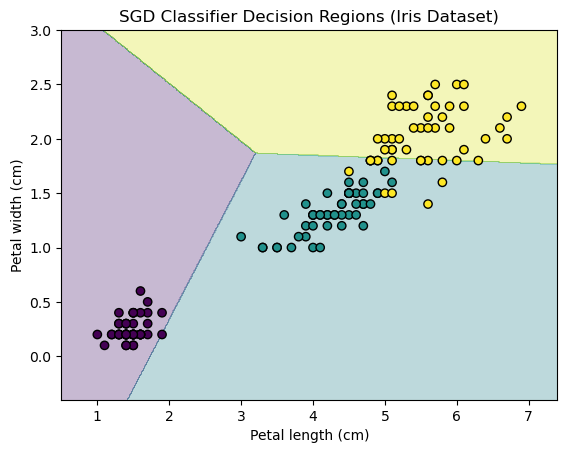

In [21]:
plt.figure()
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")

plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("SGD Classifier Decision Regions (Iris Dataset)")
plt.show()

In [33]:
[a,b]=sgd.coef_,sgd.intercept_

In [58]:
b=b.reshape(3,1)
a,b

(array([[-17.56954612, -19.03367496],
        [ 31.52859317, -57.621222  ],
        [ 34.8583878 ,  79.42166766]]),
 array([[  59.01226614],
        [ -26.12990406],
        [-293.01710927]]))

In [56]:
P=np.concatenate((a,b),axis=1)
P

array([[ -17.56954612,  -19.03367496,   59.01226614],
       [  31.52859317,  -57.621222  ,  -26.12990406],
       [  34.8583878 ,   79.42166766, -293.01710927]])

In [85]:
v=np.array([[3,2.5,1]])
v0=np.array([[3,2.5]])

In [86]:
v.T

array([[3. ],
       [2.5],
       [1. ]])

In [87]:
np.matmul(P,v.T)

array([[-41.28055963],
       [-75.59717956],
       [ 10.11222328]])

In [88]:
sgd.predict(v0)

array([2])